# Install Required Libraries

In [2]:
# Install the necessary packages
!pip install mysql-connector-python pandas matplotlib seaborn plotly


# Import the Required Libraries

In [3]:
import mysql.connector  # For MySQL connection
import pandas as pd     # For data manipulation
import matplotlib.pyplot as plt  # For basic plots
import seaborn as sns   # For advanced visualizations like heatmaps
import plotly.express as px  # For interactive plots


# Establish MySQL Connection

In [4]:
# Establishing MySQL connection
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Pradutt@2002"  # Change this to your MySQL password
)

mycursor = mydb.cursor()

# Create a new database
mycursor.execute("CREATE DATABASE IF NOT EXISTS job_applications_db")

# Select the newly created database
mycursor.execute("USE job_applications_db")

# Output to confirm the database creation
{"Database Connection": "job_applications_db created and selected"}


{'Database Connection': 'job_applications_db created and selected'}

# Create Tables for Job Applications

In [19]:
# Create the job applications table
mycursor.execute("""
CREATE TABLE IF NOT EXISTS job_applications (
    id INT AUTO_INCREMENT PRIMARY KEY,
    candidate_name VARCHAR(255),
    job_title VARCHAR(255),
    company VARCHAR(255),
    application_status VARCHAR(50),
    date_applied DATE,
    resume_link VARCHAR(255),
    source VARCHAR(100)
)
""")

# Output to confirm table creation
{"Table Creation": "job_applications table created"}


{'Table Creation': 'job_applications table created'}

#  Insert Dummy Data into the Table

In [20]:
# Inserting 5 rows of data
job_applications = [
    ("Alice Johnson", "Data Scientist", "Google", "Interviewing", "2023-10-01", "resume_link1.pdf", "LinkedIn"),
    ("Bob Smith", "Backend Developer", "Amazon", "Rejected", "2023-09-25", "resume_link2.pdf", "Indeed"),
    ("Charlie Brown", "Frontend Developer", "Microsoft", "Applied", "2023-10-05", "resume_link3.pdf", "Company Website"),
    ("Dana White", "Data Analyst", "Facebook", "Interviewing", "2023-09-30", "resume_link4.pdf", "LinkedIn"),
    ("Eve Jackson", "Software Engineer", "Netflix", "Offered", "2023-10-03", "resume_link5.pdf", "Indeed"),
]

sql = "INSERT INTO job_applications (candidate_name, job_title, company, application_status, date_applied, resume_link, source) VALUES (%s, %s, %s, %s, %s, %s, %s)"
mycursor.executemany(sql, job_applications)
mydb.commit()

# Output the number of rows inserted
{"Rows Inserted": mycursor.rowcount}


{'Rows Inserted': 5}

# Fetch Data from MySQL and Load into Pandas

In [21]:
# Query to fetch data
mycursor.execute("SELECT * FROM job_applications")
data = mycursor.fetchall()

# Load the data into a Pandas DataFrame
columns = ['ID', 'Candidate Name', 'Job Title', 'Company', 'Application Status', 'Date Applied', 'Resume Link', 'Source']
df = pd.DataFrame(data, columns=columns)

# Display the first few rows
df.head()

# Output the dataframe shape and preview
{"Data Shape": df.shape, "Data Preview": df.head()}


{'Data Shape': (15, 8),
 'Data Preview':    ID Candidate Name           Job Title    Company Application Status  \
 0   1  Alice Johnson      Data Scientist     Google       Interviewing   
 1   2      Bob Smith   Backend Developer     Amazon           Rejected   
 2   3  Charlie Brown  Frontend Developer  Microsoft            Applied   
 3   4     Dana White        Data Analyst   Facebook       Interviewing   
 4   5    Eve Jackson   Software Engineer    Netflix            Offered   
 
   Date Applied       Resume Link           Source  
 0   2023-10-01  resume_link1.pdf         LinkedIn  
 1   2023-09-25  resume_link2.pdf           Indeed  
 2   2023-10-05  resume_link3.pdf  Company Website  
 3   2023-09-30  resume_link4.pdf         LinkedIn  
 4   2023-10-03  resume_link5.pdf           Indeed  }

# Basic Data Overview and Summary

In [22]:
# Generate basic statistics
df.describe()

# Display info
df.info()

# Output summary statistics
{"Data Description": df.describe(), "Data Info": df.info()}


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  15 non-null     int64 
 1   Candidate Name      15 non-null     object
 2   Job Title           15 non-null     object
 3   Company             15 non-null     object
 4   Application Status  15 non-null     object
 5   Date Applied        15 non-null     object
 6   Resume Link         15 non-null     object
 7   Source              15 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  15 non-null     int64 
 1   Candidate Name      15 non-null     object
 2   Job Title           15 non-null     object
 3   Company             1

{'Data Description':               ID
 count  15.000000
 mean    8.000000
 std     4.472136
 min     1.000000
 25%     4.500000
 50%     8.000000
 75%    11.500000
 max    15.000000,
 'Data Info': None}

# Bar Chart - Job Applications by Status

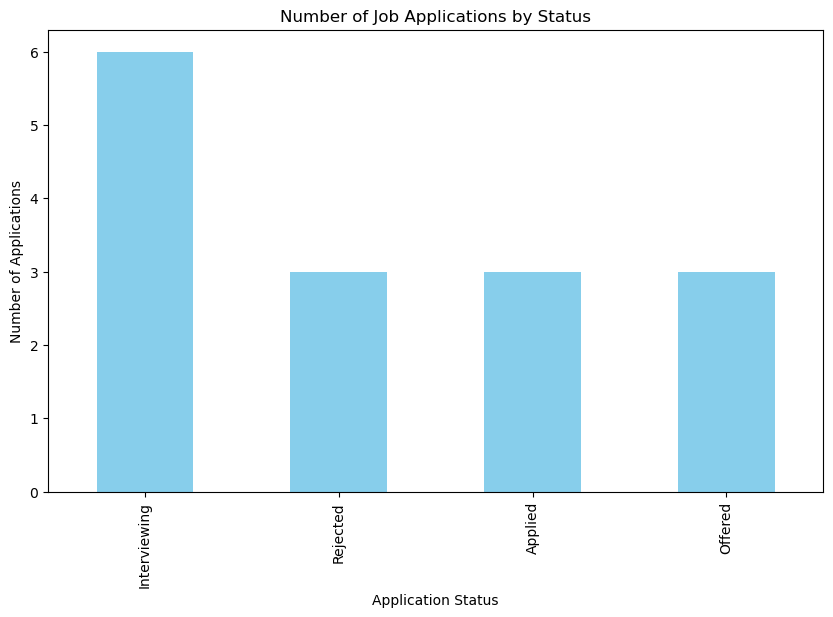

{'Application Status Counts': {'Interviewing': 6,
  'Rejected': 3,
  'Applied': 3,
  'Offered': 3}}

In [23]:
# Plot a Bar Chart
status_counts = df['Application Status'].value_counts()
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Job Applications by Status')
plt.xlabel('Application Status')
plt.ylabel('Number of Applications')
plt.show()

# Output a dictionary with counts for each status
{"Application Status Counts": status_counts.to_dict()}


# Pie Chart - Job Applications by Source

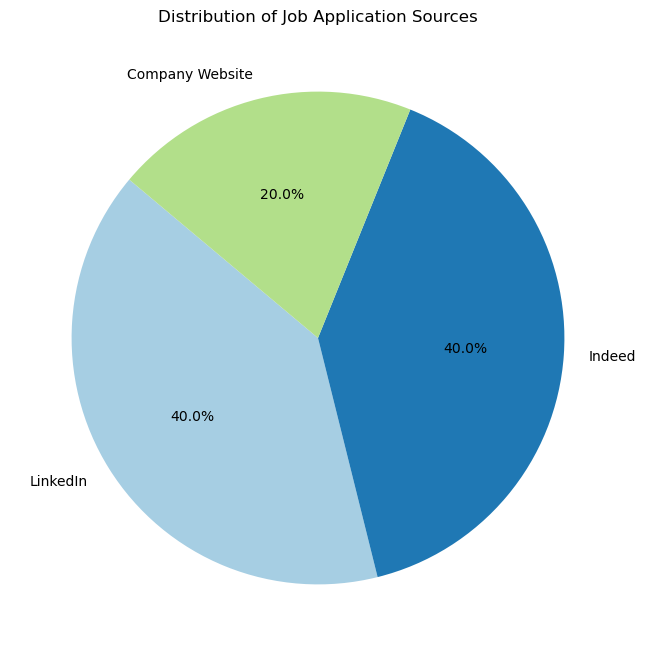

{'Application Sources Distribution': {'LinkedIn': 6,
  'Indeed': 6,
  'Company Website': 3}}

In [24]:
# Pie Chart for Job Application Sources
source_counts = df['Source'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title('Distribution of Job Application Sources')
plt.show()

# Output source counts
{"Application Sources Distribution": source_counts.to_dict()}


# Sunburst Chart - Job Title vs Company vs Status

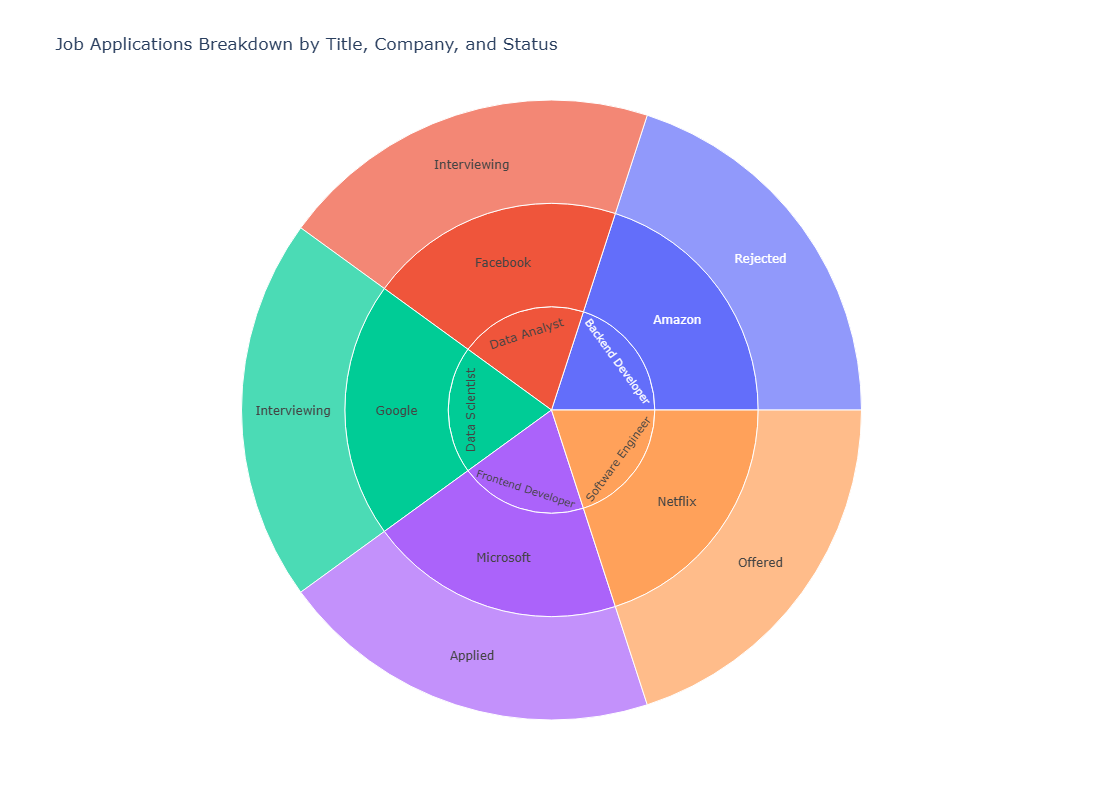

In [25]:
# Sunburst Chart with increased size
fig = px.sunburst(df, 
                  path=['Job Title', 'Company', 'Application Status'], 
                  title='Job Applications Breakdown by Title, Company, and Status',
                  width=800,  # Increase width
                  height=800  # Increase height
                 )

fig.show()


# Histogram - Distribution of Application Dates

Index(['ID', 'Candidate Name', 'Job Title', 'Company', 'Application Status',
       'Date Applied', 'Resume Link', 'Source'],
      dtype='object')


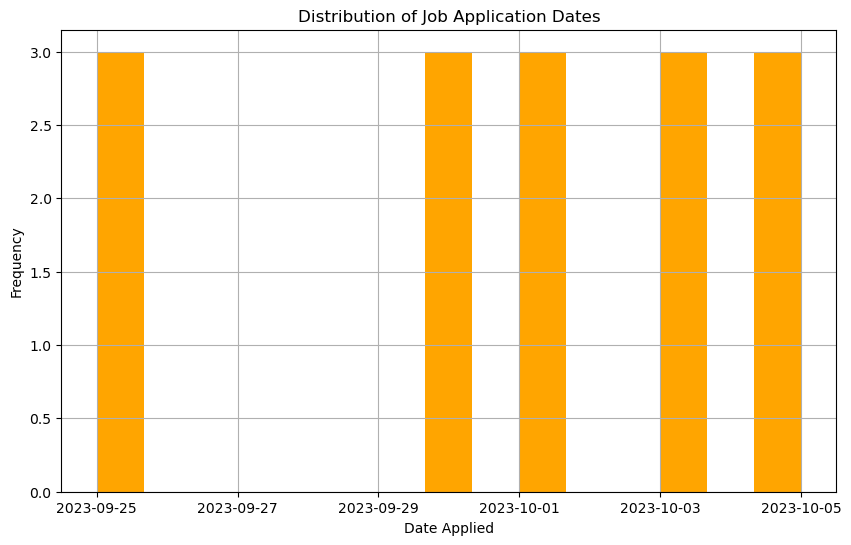

{'Date Range': (Timestamp('2023-09-25 00:00:00'), Timestamp('2023-10-05 00:00:00'))}


In [26]:
# Check the column names
print(df.columns)

# Assuming the correct column name is 'Date Applied', or find the correct one
# Convert 'Date Applied' to datetime format (Replace with correct column name if needed)
if 'Date Applied' in df.columns:
    df['Date Applied'] = pd.to_datetime(df['Date Applied'])
    
    # Histogram for date distribution
    plt.figure(figsize=(10, 6))
    df['Date Applied'].hist(bins=15, color='orange')
    plt.title('Distribution of Job Application Dates')
    plt.xlabel('Date Applied')
    plt.ylabel('Frequency')
    plt.show()

    # Output the min and max dates
    print({"Date Range": (df['Date Applied'].min(), df['Date Applied'].max())})
else:
    print("Column 'Date Applied' not found in the DataFrame.")


# Heatmap - Correlation of Numerical Data

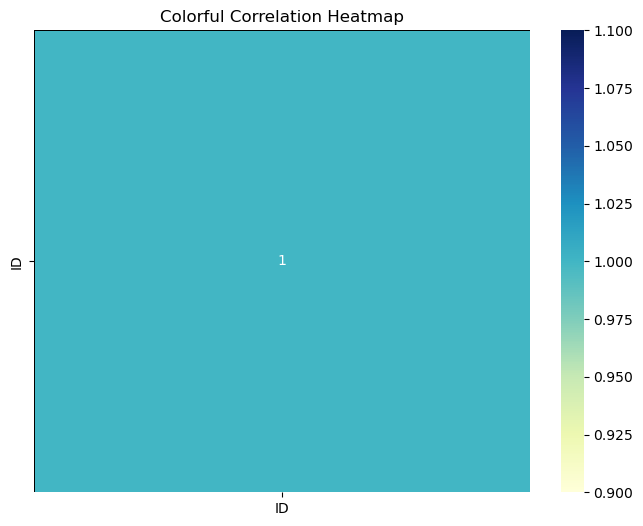

{'Correlation Matrix': {'ID': {'ID': 1.0}}}

In [29]:
# Create a sample numeric correlation matrix for demonstration
corr_matrix = df[['ID']].corr()

# Plot a colorful Heatmap
plt.figure(figsize=(8, 6))  # Increase the figure size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='black', cbar_kws={'orientation': 'vertical'})
plt.title('Colorful Correlation Heatmap')
plt.show()

# Output correlation matrix
{"Correlation Matrix": corr_matrix.to_dict()}


# Box Plot - Distribution of Application IDs

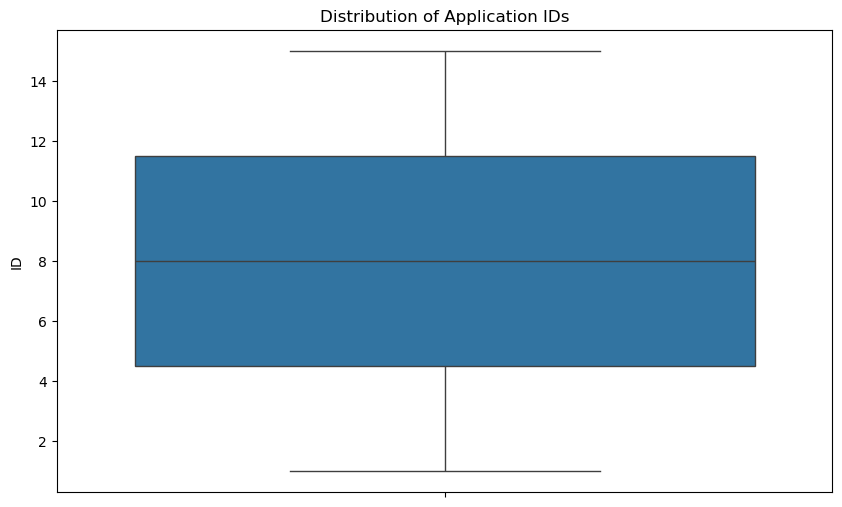

{'Application ID Stats': {'count': 15.0,
  'mean': 8.0,
  'std': 4.47213595499958,
  'min': 1.0,
  '25%': 4.5,
  '50%': 8.0,
  '75%': 11.5,
  'max': 15.0}}

In [30]:
# Plot a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(df['ID'])
plt.title('Distribution of Application IDs')
plt.show()

# Output basic statistics
{"Application ID Stats": df['ID'].describe().to_dict()}


# Area Chart - Cumulative Applications Over Time

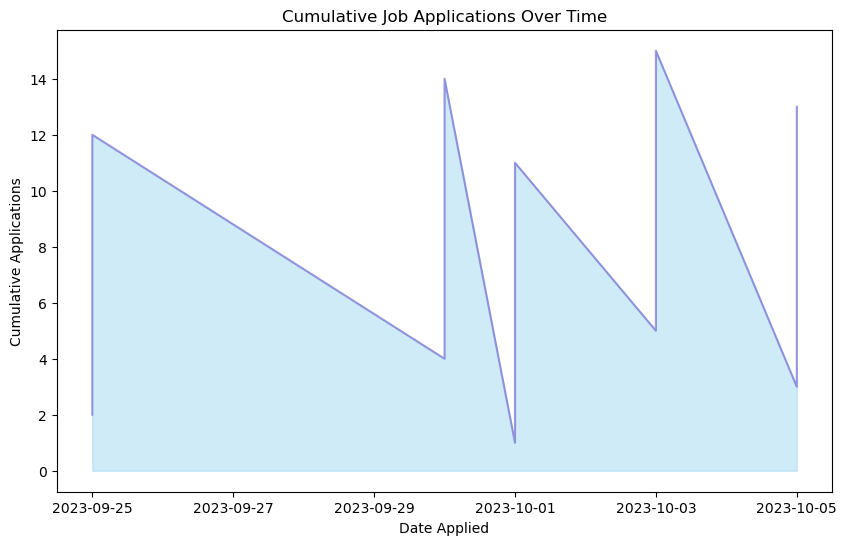

{'Total Applications': 15}

In [31]:
# Cumulative Applications Over Time
df_sorted = df.sort_values('Date Applied')
df_sorted['Cumulative Applications'] = df_sorted.index + 1

# Plot Area Chart
plt.figure(figsize=(10, 6))
plt.fill_between(df_sorted['Date Applied'], df_sorted['Cumulative Applications'], color="skyblue", alpha=0.4)
plt.plot(df_sorted['Date Applied'], df_sorted['Cumulative Applications'], color="Slateblue", alpha=0.6)
plt.title('Cumulative Job Applications Over Time')
plt.xlabel('Date Applied')
plt.ylabel('Cumulative Applications')
plt.show()

# Output final cumulative value
{"Total Applications": df_sorted['Cumulative Applications'].max()}


# Radar Chart - Job Titles Comparison

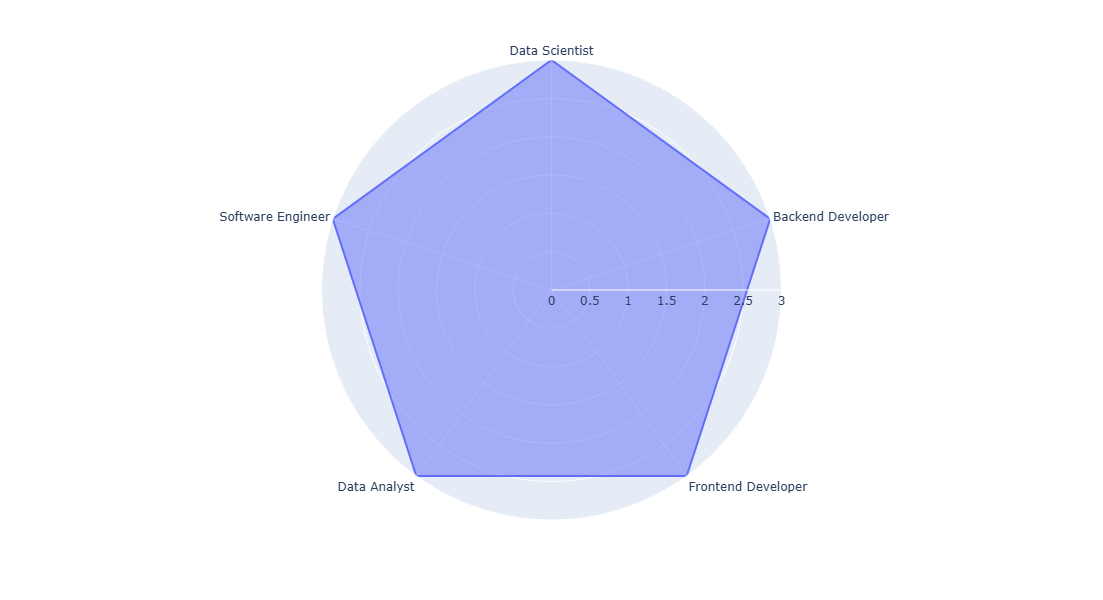

{'Job Titles Distribution': {'Data Scientist': 3,
  'Backend Developer': 3,
  'Frontend Developer': 3,
  'Data Analyst': 3,
  'Software Engineer': 3}}

In [32]:
# Radar chart for job title comparison
job_title_counts = df['Job Title'].value_counts()

fig = px.line_polar(r=job_title_counts, theta=job_title_counts.index, line_close=True)
fig.update_traces(fill='toself')

# Increase the size of the radar chart
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    width=800,  # Adjust the width of the chart
    height=600  # Adjust the height of the chart
)

fig.show()

# Output job title counts
{"Job Titles Distribution": job_title_counts.to_dict()}


# Waterfall Chart - Application Status Flow

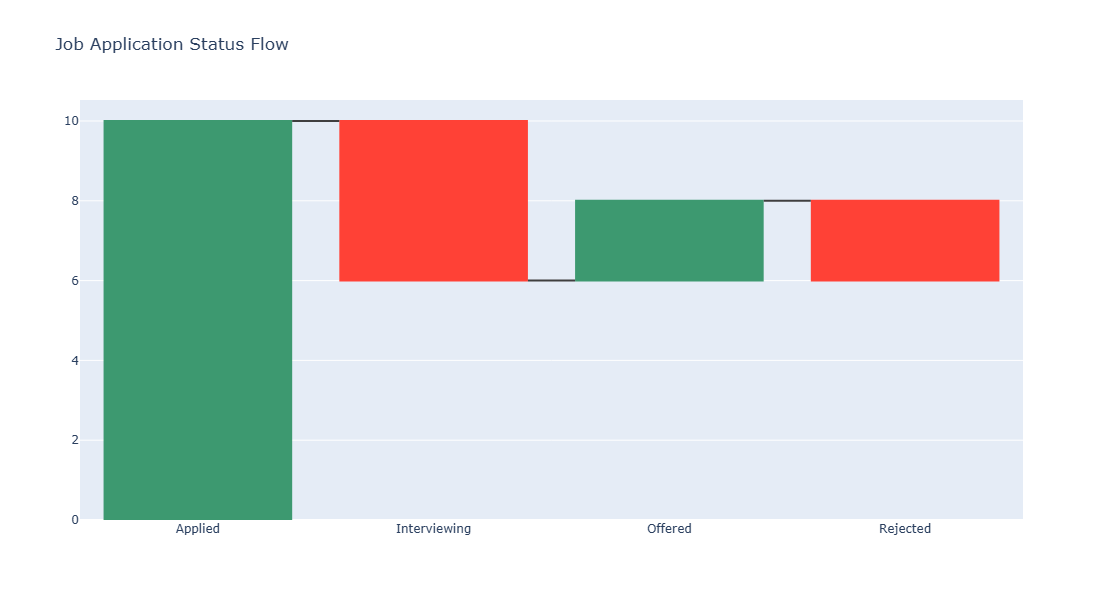

{'Waterfall Values': {'Applied': 10,
  'Interviewing': -4,
  'Offered': 2,
  'Rejected': -2}}

In [34]:
import plotly.graph_objects as go

# Simulating waterfall chart values
waterfall_values = {
    'Applied': 10,
    'Interviewing': -4,
    'Offered': 2,
    'Rejected': -2
}

# Create the waterfall chart using graph_objects
fig = go.Figure(go.Waterfall(
    x=list(waterfall_values.keys()),
    y=list(waterfall_values.values()),
    connector={"line": {"color": "rgb(63, 63, 63)"}} 
))

# Adding title and increasing the size
fig.update_layout(
    title="Job Application Status Flow",
    width=900,   # Set the width of the chart
    height=600   # Set the height of the chart
)

# Display the figure
fig.show()

# Output waterfall values
{"Waterfall Values": waterfall_values}


# Slope Chart - Comparison of Two Data Points

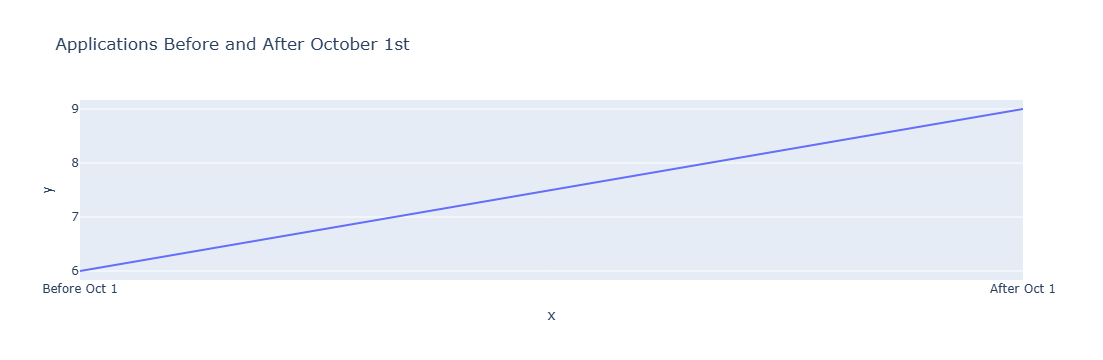

{'Applications Before and After': {'Before Oct': 6, 'After Oct': 9}}

In [35]:
# Slope Chart - Applications Before and After October 1st
before_oct = df[df['Date Applied'] < '2023-10-01'].shape[0]
after_oct = df[df['Date Applied'] >= '2023-10-01'].shape[0]

fig = px.line(
    x=['Before Oct 1', 'After Oct 1'], 
    y=[before_oct, after_oct],
    title="Applications Before and After October 1st"
)
fig.show()

# Output slope values
{"Applications Before and After": {"Before Oct": before_oct, "After Oct": after_oct}}


# Bullet Graph - Progress Toward Application Goals

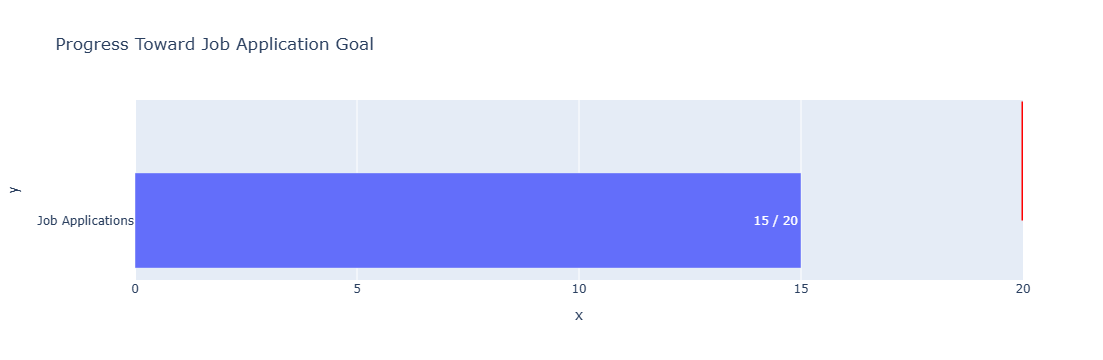

{'Goal Progress': {'Current Applications': 15, 'Goal': 20}}

In [36]:
# Bullet Graph Simulation
applications_goal = 20
current_applications = df.shape[0]

fig = px.bar(
    x=[current_applications], 
    y=["Job Applications"], 
    title="Progress Toward Job Application Goal",
    range_x=[0, applications_goal],
    text=[f"{current_applications} / {applications_goal}"]
)
fig.add_shape(type='line', x0=applications_goal, x1=applications_goal, y0=0, y1=1, line=dict(color='Red', width=3))

fig.show()

# Output progress toward goal
{"Goal Progress": {"Current Applications": current_applications, "Goal": applications_goal}}


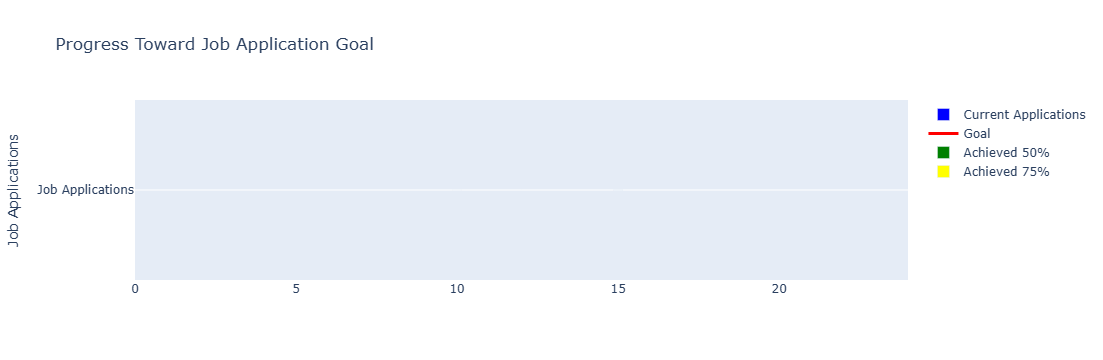

{'Goal Progress': {'Current Applications': 15, 'Goal': 20}}

In [37]:
import plotly.graph_objects as go

# Simulation of application goal
applications_goal = 20
current_applications = df.shape[0]

# Create a bullet chart using graph_objects
fig = go.Figure()

# Add a bar for current applications
fig.add_trace(go.Bar(
    x=[current_applications],
    y=["Job Applications"],
    width=0.3,
    name='Current Applications',
    marker=dict(color='blue')
))

# Add a line for the application goal
fig.add_trace(go.Scatter(
    x=[applications_goal, applications_goal],
    y=["Job Applications", "Job Applications"],
    mode='lines',
    name='Goal',
    line=dict(color='red', width=3)
))

# Adding qualitative ranges
fig.add_trace(go.Bar(
    x=[applications_goal * 0.5],  # 50% of the goal for green range
    y=["Job Applications"],
    width=0.3,
    name='Achieved 50%',
    marker=dict(color='green', opacity=0.5)
))

fig.add_trace(go.Bar(
    x=[applications_goal * 0.75],  # 75% of the goal for yellow range
    y=["Job Applications"],
    width=0.3,
    name='Achieved 75%',
    marker=dict(color='yellow', opacity=0.5)
))

# Add layout details
fig.update_layout(
    title="Progress Toward Job Application Goal",
    xaxis=dict(range=[0, applications_goal * 1.2]),  # Adjust range for better visualization
    yaxis_title='Job Applications',
    barmode='overlay'  # Overlay bars for qualitative ranges
)

# Display the figure
fig.show()

# Output progress toward goal
{"Goal Progress": {"Current Applications": current_applications, "Goal": applications_goal}}
